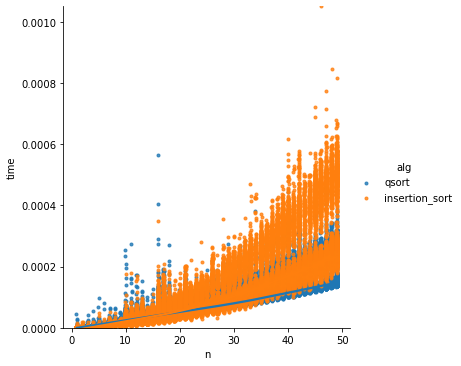

In [18]:
import numpy as np
import numpy.random as ran
from timeit import default_timer as timer

import pandas as pd
import seaborn as sns

def partition(x, i, j):
    pivot_index=i
    pivot=x[pivot_index]
    while i<j:
        while i < len(x) and x[i]<=pivot:
            i+=1
        while x[j]>pivot:
            j-=1
        if i<j:
            x[i],x[j]=x[j],x[i]
    x[j],x[pivot_index]=x[pivot_index],x[j]
    return j

def qsort_rec(x, i, j):
    if j-i<1:
        return
    k = partition(x, i, j)
    qsort_rec(x, i, k-1)
    qsort_rec(x, k+1, j)

def qsort(x):
    qsort_rec(x,0,len(x)-1)
    return x

def insertion_sort(x):
    for i in range(1,len(x)):
        j = i
        while j > 0 and x[j-1] > x[j]:
            x[j-1], x[j] = x[j], x[j-1]
            j -= 1

def time_algorithms(ns, sort_algs):
    """
    Run each sort-algorithm implemented in functions and
    provided in `sort_algs` on random lists of length
    n for each n in `ns`.
    
    Returns a Pandas DataFrame that we can use for plotting
    or extracting summary data.
    """
    algs, ns_, times = [], [], []
    for n in ns:
        x = list(ran.randint(10, size = n))
        for alg in sort_algs:
            x_copy = x[:]
            start = timer()
            alg(x_copy)
            end = timer()
            
            algs.append(alg.__name__)
            ns_.append(n)
            times.append(end - start)
            assert sorted(x) == x_copy
    
    return pd.DataFrame({'alg': algs, 'n': ns_, 'time': times})

algs = [qsort, insertion_sort]
no_reps = 1000
min_n, max_n = 1, 50
ns = []
for n in range(min_n, max_n):
    ns.extend([n] * no_reps)
time_measures = time_algorithms(ns, algs)

g = sns.lmplot(x = 'n', y = 'time', hue = 'alg', lowess = True,
           x_jitter = 0.1, markers='.',
           data = time_measures)
g.set(ylim = (0, max(time_measures['time'])))